<b>Question 2.4: Evaluate the performance of the network with different rates of label noise (%10, %25, %50, %75, %100) applied. Illustrate your result in a plot. </b>

In [59]:
# Copyright 2016 The TensorFlow Authors. All Rights Reserved.
#
#  Licensed under the Apache License, Version 2.0 (the "License");
#  you may not use this file except in compliance with the License.
#  You may obtain a copy of the License at
#
#   http://www.apache.org/licenses/LICENSE-2.0
#
#  Unless required by applicable law or agreed to in writing, software
#  distributed under the License is distributed on an "AS IS" BASIS,
#  WITHOUT WARRANTIES OR CONDITIONS OF ANY KIND, either express or implied.
#  See the License for the specific language governing permissions and
#  limitations under the License.
"""Convolutional Neural Network Estimator for MNIST, built with tf.layers."""

from __future__ import absolute_import
from __future__ import division
from __future__ import print_function

import numpy as np
import tensorflow as tf
import sys
import matplotlib.pyplot as plt
#tf.logging.set_verbosity(tf.logging.INFO)
classes = [0,1,2]  ####REDUCED THE NUMBER OF CLASSES BECAUSE MY PC WAS SLOW
num_classes = len(classes)

def my_cnn_model_fn(features, labels, mode):
  """Model function for CNN."""
  # Input Layer
  # Reshape X to 4-D tensor: [batch_size, width, height, channels]
  # MNIST images are 28x28 pixels, and have one color channel
  input_layer = tf.reshape(features["x"], [-1, 28, 28, 1])

  # Convolutional Layer #1
  conv1 = tf.layers.conv2d(
      inputs=input_layer,
      filters=32,
      kernel_size=[5, 5],
      padding="same",
      activation=tf.nn.relu)

  # Pooling Layer #1
  pool1 = tf.layers.max_pooling2d(inputs=conv1, pool_size=[2, 2], strides=2)

  # Convolutional Layer #2
  conv2 = tf.layers.conv2d(
      inputs=pool1,
      filters=64,
      kernel_size=[5, 5],
      padding="same",
      activation=tf.nn.relu)

  # Pooling Layer #2
  pool2 = tf.layers.max_pooling2d(inputs=conv2, pool_size=[2, 2], strides=2)

  # Flatten tensor into a batch of vectors
  pool2_flat = tf.reshape(pool2, [-1, 7 * 7 * 64])

  # Dense Layer
  dense = tf.layers.dense(inputs=pool2_flat, units=1024, activation=tf.nn.relu)

  # Add dropout operation; 0.6 probability that element will be kept
  dropout = tf.layers.dropout(
      inputs=dense, rate=0.4, training=mode == tf.estimator.ModeKeys.TRAIN)

  # Logits layer
  # Input Tensor Shape: [batch_size, 1024]
  # Output Tensor Shape: [batch_size, 10]
  logits = tf.layers.dense(inputs=dropout, units= num_classes)

  predictions = {
      # Generate predictions (for PREDICT and EVAL mode)
      "classes": tf.argmax(input=logits, axis=1),
      # Add `softmax_tensor` to the graph. It is used for PREDICT and by the
      # `logging_hook`.
      "probabilities": tf.nn.softmax(logits, name="softmax_tensor")
  }
  if mode == tf.estimator.ModeKeys.PREDICT:
    return tf.estimator.EstimatorSpec(mode=mode, predictions=predictions)

  # Calculate Loss (for both TRAIN and EVAL modes)
  loss = tf.losses.sparse_softmax_cross_entropy(labels=labels, logits=logits)

  # Configure the Training Op (for TRAIN mode)
  if mode == tf.estimator.ModeKeys.TRAIN:
    optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.001)
    train_op = optimizer.minimize(
        loss=loss,
        global_step=tf.train.get_global_step())
    return tf.estimator.EstimatorSpec(mode=mode, loss=loss, train_op=train_op)

 #  Add evaluation metrics (for EVAL mode)
  eval_metric_ops = {
      "accuracy": tf.metrics.accuracy(
          labels=labels, predictions=predictions["classes"])}
  return tf.estimator.EstimatorSpec(
      mode=mode, loss=loss, eval_metric_ops=eval_metric_ops)


#  # Load training and eval data
mnist = tf.contrib.learn.datasets.load_dataset("mnist")
  
train_data = mnist.train.images  # Returns np.array
train_labels = np.asarray(mnist.train.labels, dtype=np.int32)
indices = np.isin(train_labels,classes)
sample_train_data = train_data[indices,:]
sample_train_labels = train_labels[indices]


eval_data = mnist.test.images  # Returns np.array
eval_labels = np.asarray(mnist.test.labels, dtype=np.int32)
indices_test = np.isin(eval_labels,classes)
sample_eval_data = eval_data[indices_test,:]
sample_eval_labels = eval_labels[indices_test]

  # Create the Estimator
mnist_classifier = tf.estimator.Estimator(
      model_fn=my_cnn_model_fn)#, model_dir="/tmp/mnist_convnet_model")


Extracting MNIST-data\train-images-idx3-ubyte.gz
Extracting MNIST-data\train-labels-idx1-ubyte.gz
Extracting MNIST-data\t10k-images-idx3-ubyte.gz
Extracting MNIST-data\t10k-labels-idx1-ubyte.gz
INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_save_summary_steps': 100, '_model_dir': 'C:\\Users\\shilp\\AppData\\Local\\Temp\\tmpu90cx6gq', '_num_worker_replicas': 1, '_save_checkpoints_secs': 600, '_master': '', '_service': None, '_log_step_count_steps': 100, '_session_config': None, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x0000016A0B0B4128>, '_keep_checkpoint_max': 5, '_task_type': 'worker', '_keep_checkpoint_every_n_hours': 10000, '_num_ps_replicas': 0, '_task_id': 0, '_save_checkpoints_steps': None, '_tf_random_seed': None, '_is_chief': True}


INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Saving checkpoints for 1 into C:\Users\shilp\AppData\Local\Temp\tmp5dskvuh3\model.ckpt.
INFO:tensorflow:loss = 1.585874, step = 1
INFO:tensorflow:Saving checkpoints for 100 into C:\Users\shilp\AppData\Local\Temp\tmp5dskvuh3\model.ckpt.
INFO:tensorflow:Loss for final step: 1.5634602.
INFO:tensorflow:Starting evaluation at 2018-03-22-13:42:18
INFO:tensorflow:Restoring parameters from C:\Users\shilp\AppData\Local\Temp\tmp5dskvuh3\model.ckpt-100
INFO:tensorflow:Finished evaluation at 2018-03-22-13:42:29
INFO:tensorflow:Saving dict for global step 100: accuracy = 0.6034248, global_step = 100, loss = 1.5605365

EVAL_RESULTS at  10 % noise {'loss': 1.5605365, 'accuracy': 0.6034248, 'global_step': 100}

INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Restoring parameters from C:\Users\shilp\AppData\Local\Temp\tmp5dskvuh3\model.ckpt-100
INFO:tensorflow:Saving checkpoints for 101 into C:\Users\shilp\AppData\Local\Temp\tmp5ds

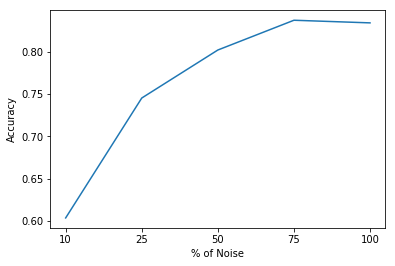

In [36]:
arr = [10,25,50,75,100]
arr1 =[]


########  Accuracy with different levels of noise with just one iteration ##########

for i in range(len(arr)):

#shuffling the data for 10%,25%,50%,75% and 100% noise
    m=n*(arr[i]/100)
    np.random.shuffle(sample_train_labels[0:int(m)])
    train_input_fn = tf.estimator.inputs.numpy_input_fn(
        x={"x": sample_train_data},
        y=sample_train_labels,
        batch_size=20,
        num_epochs=None,
        shuffle=True)
    mnist_classifier.train(
        input_fn=train_input_fn,
        steps=100)

  # Evaluate the model and print results
    eval_input_fn = tf.estimator.inputs.numpy_input_fn(
        x={"x": sample_eval_data},
        y=sample_eval_labels,
        batch_size=20,
        num_epochs=1,
        shuffle=False)
    eval_results = mnist_classifier.evaluate(input_fn=eval_input_fn)
    print("")
    print("EVAL_RESULTS at ",arr[i],"% noise",eval_results)
    print("")

    #Storing the accuracy for each iteration in an array
    arr1=np.append(arr1,eval_results["accuracy"])

x= [i for i in range(0,len(arr))]
plt.plot(arr1)
plt.xlabel("% of Noise")
plt.xticks(x,arr)
plt.ylabel("Accuracy")
plt.title("Accuracy with different levels of noise")
plt.show()

INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Saving checkpoints for 1 into C:\Users\shilp\AppData\Local\Temp\tmpu90cx6gq\model.ckpt.
INFO:tensorflow:loss = 1.0883477, step = 1
INFO:tensorflow:Saving checkpoints for 100 into C:\Users\shilp\AppData\Local\Temp\tmpu90cx6gq\model.ckpt.
INFO:tensorflow:Loss for final step: 0.9140297.
INFO:tensorflow:Starting evaluation at 2018-03-22-16:16:46
INFO:tensorflow:Restoring parameters from C:\Users\shilp\AppData\Local\Temp\tmpu90cx6gq\model.ckpt-100
INFO:tensorflow:Finished evaluation at 2018-03-22-16:16:57
INFO:tensorflow:Saving dict for global step 100: accuracy = 0.45058787, global_step = 100, loss = 1.0576133

Accuracy in iteration 1  with batch size  5 for test data with  10 % noise in the labels is 0.8705797

INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Restoring parameters from C:\Users\shilp\AppData\Local\Temp\tmpu90cx6gq\model.ckpt-100
INFO:tensorflow:Saving checkpoints for 101 into C:\Users\shilp\AppData\Loca

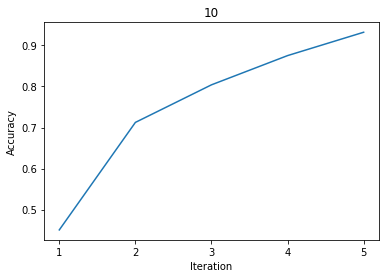

INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Restoring parameters from C:\Users\shilp\AppData\Local\Temp\tmpu90cx6gq\model.ckpt-500
INFO:tensorflow:Saving checkpoints for 501 into C:\Users\shilp\AppData\Local\Temp\tmpu90cx6gq\model.ckpt.
INFO:tensorflow:loss = 0.9448474, step = 501
INFO:tensorflow:Saving checkpoints for 600 into C:\Users\shilp\AppData\Local\Temp\tmpu90cx6gq\model.ckpt.
INFO:tensorflow:Loss for final step: 1.2758863.
INFO:tensorflow:Starting evaluation at 2018-03-22-16:19:29
INFO:tensorflow:Restoring parameters from C:\Users\shilp\AppData\Local\Temp\tmpu90cx6gq\model.ckpt-600
INFO:tensorflow:Finished evaluation at 2018-03-22-16:19:39
INFO:tensorflow:Saving dict for global step 600: accuracy = 0.8964093, global_step = 600, loss = 0.81844693

Accuracy in iteration 1  with batch size  5 for test data with  25 % noise in the labels is 0.8705797

INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Restoring parameters from C:\Users\shilp\AppData\Local\

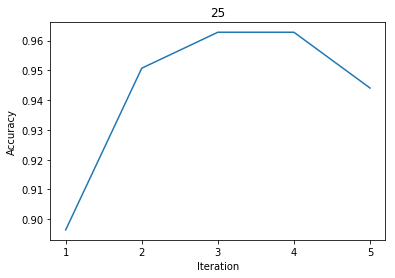

INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Restoring parameters from C:\Users\shilp\AppData\Local\Temp\tmpu90cx6gq\model.ckpt-1000
INFO:tensorflow:Saving checkpoints for 1001 into C:\Users\shilp\AppData\Local\Temp\tmpu90cx6gq\model.ckpt.
INFO:tensorflow:loss = 0.52795947, step = 1001
INFO:tensorflow:Saving checkpoints for 1100 into C:\Users\shilp\AppData\Local\Temp\tmpu90cx6gq\model.ckpt.
INFO:tensorflow:Loss for final step: 0.5959023.
INFO:tensorflow:Starting evaluation at 2018-03-22-16:22:19
INFO:tensorflow:Restoring parameters from C:\Users\shilp\AppData\Local\Temp\tmpu90cx6gq\model.ckpt-1100
INFO:tensorflow:Finished evaluation at 2018-03-22-16:22:28
INFO:tensorflow:Saving dict for global step 1100: accuracy = 0.97648555, global_step = 1100, loss = 0.40420324

Accuracy in iteration 1  with batch size  5 for test data with  50 % noise in the labels is 0.8705797

INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Restoring parameters from C:\Users\shilp\AppDa

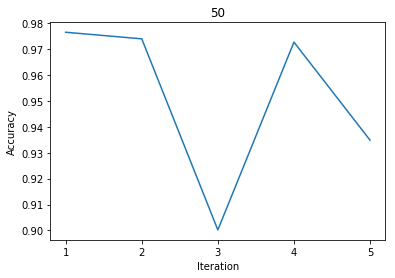

INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Restoring parameters from C:\Users\shilp\AppData\Local\Temp\tmpu90cx6gq\model.ckpt-1500
INFO:tensorflow:Saving checkpoints for 1501 into C:\Users\shilp\AppData\Local\Temp\tmpu90cx6gq\model.ckpt.
INFO:tensorflow:loss = 1.0699122, step = 1501
INFO:tensorflow:Saving checkpoints for 1600 into C:\Users\shilp\AppData\Local\Temp\tmpu90cx6gq\model.ckpt.
INFO:tensorflow:Loss for final step: 1.512913.
INFO:tensorflow:Starting evaluation at 2018-03-22-16:24:47
INFO:tensorflow:Restoring parameters from C:\Users\shilp\AppData\Local\Temp\tmpu90cx6gq\model.ckpt-1600
INFO:tensorflow:Finished evaluation at 2018-03-22-16:24:59
INFO:tensorflow:Saving dict for global step 1600: accuracy = 0.94884014, global_step = 1600, loss = 0.70539147

Accuracy in iteration 1  with batch size  5 for test data with  75 % noise in the labels is 0.8705797

INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Restoring parameters from C:\Users\shilp\AppData

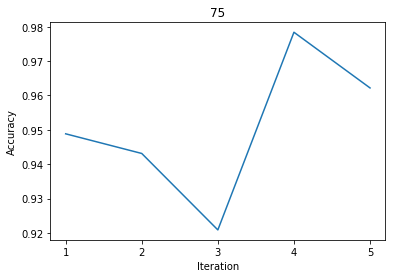

INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Restoring parameters from C:\Users\shilp\AppData\Local\Temp\tmpu90cx6gq\model.ckpt-2000
INFO:tensorflow:Saving checkpoints for 2001 into C:\Users\shilp\AppData\Local\Temp\tmpu90cx6gq\model.ckpt.
INFO:tensorflow:loss = 1.444545, step = 2001
INFO:tensorflow:Saving checkpoints for 2100 into C:\Users\shilp\AppData\Local\Temp\tmpu90cx6gq\model.ckpt.
INFO:tensorflow:Loss for final step: 1.1449081.
INFO:tensorflow:Starting evaluation at 2018-03-22-16:27:15
INFO:tensorflow:Restoring parameters from C:\Users\shilp\AppData\Local\Temp\tmpu90cx6gq\model.ckpt-2100
INFO:tensorflow:Finished evaluation at 2018-03-22-16:27:26
INFO:tensorflow:Saving dict for global step 2100: accuracy = 0.90689546, global_step = 2100, loss = 0.7994543

Accuracy in iteration 1  with batch size  5 for test data with  100 % noise in the labels is 0.8705797

INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Restoring parameters from C:\Users\shilp\AppData

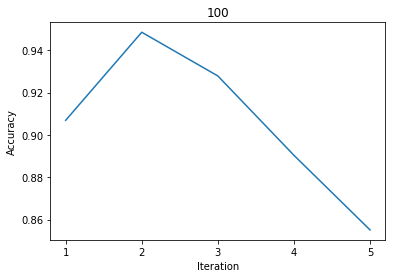

In [60]:
########  Accuracy with different levels of noise with 5 iteration and different batch sizes ##########

##Finding the length of the train labels
n = sample_train_labels.__len__()

def noise(k):
    m=n*(k/100)
    loss_test = []
    loss_train = []
    arr1 =[]
    np.random.shuffle(sample_train_labels[0:int(m)])
# Train the model
    for i  in range(1,6):
        train_input_fn = tf.estimator.inputs.numpy_input_fn(
            x={"x": sample_train_data},
            y=sample_train_labels,
            batch_size=5*i,
            num_epochs=None,
            shuffle=True)
        mnist_classifier.train(
            input_fn=train_input_fn,
            steps=100)
        eval_input_fn = tf.estimator.inputs.numpy_input_fn(
            x={"x": sample_eval_data},
            y=sample_eval_labels,
            batch_size=5*i,
            num_epochs=1,
            shuffle=False)
    
        train_input_fn = tf.estimator.inputs.numpy_input_fn(
            x={"x": sample_train_data},
            y=sample_train_labels,
            batch_size=5*i,
            num_epochs=1,
            shuffle=False)
    
        eval_results = mnist_classifier.evaluate(input_fn=eval_input_fn)
#        train_results = mnist_classifier.evaluate(input_fn=train_input_fn)
    
#        loss_test=np.append(loss_test_100,eval_results100['accuracy'])
#        loss_train=np.append(loss_train_100,train_results100['accuracy'])
#        print("Accuracy in iteration",i, " with batch size ",5*i,"for train data with ", k,"% noise in the labels is",train_results100["accuracy"])
        
        print("")    
        print("Accuracy in iteration",i, " with batch size ",5*i,"for test data with ", k,"% noise in the labels is",eval_results100["accuracy"])
        print("")

        #Storing the accuracy for each iteration in an array
        arr1=np.append(arr1,eval_results["accuracy"])
        
    t=[1,2,3,4,5]
    x= [i for i in range(len(t))]
    plt.plot(arr1)
    plt.xlabel("Iteration")
    plt.xticks(x,t)
    plt.ylabel("Accuracy")
    plt.title(k)
    plt.show()
noise(10)
noise(25)
noise(50)
noise(75)
noise(100)

I added different level of noise in the train label and evaluated the accuracy of the network. Although the accuracy of noisy data is not as good as the clean data, the model is still learning with high accuracies. With 10% noise the accuracy is increasing in from 0.5 tp 0.9 in five iterations and with 25% noise the accuracy is strangely dropping from 0.96 to 0.95 in last iteration (the drop is not significant because of less number of bacth sizes used to runt the code). Similarly, the accuracies are droppig in last iterations for 50% and 75% noise. But with 100% noise the accuracy starts dropping from the second step. In all the cases we notice the model is still learning which means the neural network are robust to noise.

<b> Explain the performance of your network with %100 noise, specifically the difference between the training and test error.</b>

INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Restoring parameters from C:\Users\shilp\AppData\Local\Temp\tmpywspzwh3\model.ckpt-1001
INFO:tensorflow:Saving checkpoints for 1002 into C:\Users\shilp\AppData\Local\Temp\tmpywspzwh3\model.ckpt.
INFO:tensorflow:loss = 1.6828922, step = 1002
INFO:tensorflow:Saving checkpoints for 1101 into C:\Users\shilp\AppData\Local\Temp\tmpywspzwh3\model.ckpt.
INFO:tensorflow:Loss for final step: 1.6245782.
INFO:tensorflow:Starting evaluation at 2018-03-22-15:44:21
INFO:tensorflow:Restoring parameters from C:\Users\shilp\AppData\Local\Temp\tmpywspzwh3\model.ckpt-1101
INFO:tensorflow:Finished evaluation at 2018-03-22-15:44:32
INFO:tensorflow:Saving dict for global step 1101: accuracy = 0.884051, global_step = 1101, loss = 1.0658532
INFO:tensorflow:Starting evaluation at 2018-03-22-15:44:32
INFO:tensorflow:Restoring parameters from C:\Users\shilp\AppData\Local\Temp\tmpywspzwh3\model.ckpt-1101
INFO:tensorflow:Finished evaluation at 2018-03-22-1

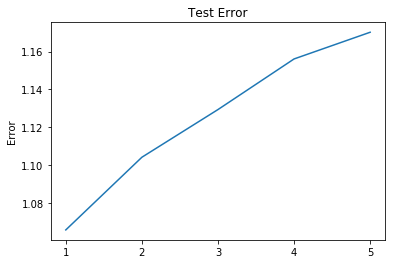


Errors for train data with 100% noise in the labels is [1.41516995 1.40743935 1.40292466 1.39957476 1.3970629 ]


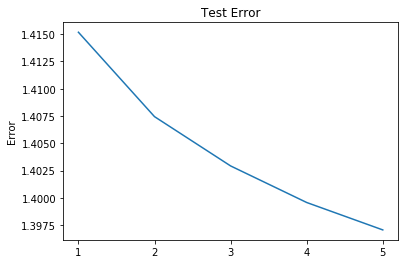

In [50]:
loss_test_100 = []
loss_train_100 = []

np.random.shuffle(sample_train_labels)
# Train the model
for i  in range(1,6):
    train_input_fn = tf.estimator.inputs.numpy_input_fn(
        x={"x": sample_train_data},
        y=sample_train_labels,
        batch_size=5*i,
        num_epochs=None,
        shuffle=True)
    mnist_classifier.train(
    input_fn=train_input_fn,
    steps=100)
    eval_input_fn = tf.estimator.inputs.numpy_input_fn(
        x={"x": sample_eval_data},
        y=sample_eval_labels,
        batch_size=10*i,
        num_epochs=1,
        shuffle=False)
    
    train_input_fn = tf.estimator.inputs.numpy_input_fn(
        x={"x": sample_train_data},
        y=sample_train_labels,
        batch_size=5*i,
        num_epochs=1,
        shuffle=False)
    
    eval_results100 = mnist_classifier.evaluate(input_fn=eval_input_fn)
    train_results100 = mnist_classifier.evaluate(input_fn=train_input_fn)
    print("")
    print("Loss in iteration",i, " with batch size ",10*i,"for train data with 100% noise in the labels is",train_results100["loss"])
    loss_test_100=np.append(loss_test_100,eval_results100['loss'])
    print("Loss in iteration",i, " with batch size ",10*i,"for test data with 100% noise in the labels is",eval_results100["loss"])
    print("")
    loss_train_100=np.append(loss_train_100,train_results100['loss'])

print("")

t=[1,2,3,4,5]
x= [i for i in range(len(t))]

plt.plot(loss_test_100)
plt.ylabel("Error")
plt.title("Test Error")
plt.xticks(x,t)
plt.show()

print("")
plt.plot(loss_train_100)
plt.ylabel("Error")
plt.title("Test Error")
plt.xticks(x,t)
plt.show()

I ran the code for evaluating both test and train error and we notice the rate in which train and test error are changing is similar. The train  error is going from approximately 1 to 1.6 in five iterations. Conversely, the test error is declining from 1.415 to 1.395, because the batch size is very small the decline is not significant. But when we train the model for all the classes taking all the input images, the change in test and train  error will be significant with every iteration. 